In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.shape

(550068, 10)

In [ ]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [ ]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

In [ ]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [ ]:
df['Occupation'].sort_values(ascending=False).unique()

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1,  0])

In [ ]:
df['Marital_Status'].unique()

array([0, 1])

In [ ]:
df['Product_Category'].sort_values(ascending=False).unique()

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1])

In [ ]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [ ]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df = df[df['Age'] != '0-17']
df['Age'].unique()

array(['55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [ ]:
# Let's initialize the numbers of the Occupation
df['Occupation'] = df['Occupation'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534966 entries, 4 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     534966 non-null  int64 
 1   Product_ID                  534966 non-null  object
 2   Gender                      534966 non-null  object
 3   Age                         534966 non-null  object
 4   Occupation                  534966 non-null  object
 5   City_Category               534966 non-null  object
 6   Stay_In_Current_City_Years  534966 non-null  object
 7   Marital_Status              534966 non-null  int64 
 8   Product_Category            534966 non-null  int64 
 9   Purchase                    534966 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 44.9+ MB


<ipython-input-546-c5908f946930>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = df['Occupation'].astype(str)


In [ ]:
df['Occupation'] = df['Occupation'].replace('0.0', 'Software Developer')
df['Occupation'] = df['Occupation'].replace('1.0', 'Teacher')
df['Occupation'] = df['Occupation'].replace('2.0', 'Graphic Designer')
df['Occupation'] = df['Occupation'].replace('3.0', 'Nurse')
df['Occupation'] = df['Occupation'].replace('4.0', 'Electrician')
df['Occupation'] = df['Occupation'].replace('5.0', 'Data Scientist')
df['Occupation'] = df['Occupation'].replace('6.0', 'Marketing Manager')

df['Occupation'] = df['Occupation'].replace('7.0', 'Financial Analyst')
df['Occupation'] = df['Occupation'].replace('8.0', 'Architect')
df['Occupation'] = df['Occupation'].replace('9.0', 'Chef')
df['Occupation'] = df['Occupation'].replace('10.0', 'Mechanical Engineer')
df['Occupation'] = df['Occupation'].replace('11.0', 'Journalist')
df['Occupation'] = df['Occupation'].replace('12.0', 'Photographer')
df['Occupation'] = df['Occupation'].replace('13.0', 'Pharmacist')

df['Occupation'] = df['Occupation'].replace('14.0', 'Civil Engineer')
df['Occupation'] = df['Occupation'].replace('15.0', 'Lawyer')
df['Occupation'] = df['Occupation'].replace('16.0', 'Dentist')
df['Occupation'] = df['Occupation'].replace('17.0', 'Pilot')
df['Occupation'] = df['Occupation'].replace('18.0', 'Research Scientist')
df['Occupation'] = df['Occupation'].replace('19.0', 'Social Worker')
df['Occupation'] = df['Occupation'].replace('20.0', 'Veterinarian')

<ipython-input-547-266bd9213e88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = df['Occupation'].replace('0.0', 'Software Developer')
<ipython-input-547-266bd9213e88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = df['Occupation'].replace('1.0', 'Teacher')
<ipython-input-547-266bd9213e88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
df['Occupation'] = df['Occupation'].replace('0', 'Software Developer')
df['Occupation'] = df['Occupation'].replace('1', 'Teacher')
df['Occupation'] = df['Occupation'].replace('2', 'Graphic Designer')
df['Occupation'] = df['Occupation'].replace('3', 'Nurse')
df['Occupation'] = df['Occupation'].replace('4', 'Electrician')
df['Occupation'] = df['Occupation'].replace('5', 'Data Scientist')
df['Occupation'] = df['Occupation'].replace('6', 'Marketing Manager')

df['Occupation'] = df['Occupation'].replace('7', 'Financial Analyst')
df['Occupation'] = df['Occupation'].replace('8', 'Architect')
df['Occupation'] = df['Occupation'].replace('9', 'Chef')
df['Occupation'] = df['Occupation'].replace('10', 'Mechanical Engineer')
df['Occupation'] = df['Occupation'].replace('11', 'Journalist')
df['Occupation'] = df['Occupation'].replace('12', 'Photographer')
df['Occupation'] = df['Occupation'].replace('13', 'Pharmacist')

df['Occupation'] = df['Occupation'].replace('14', 'Civil Engineer')
df['Occupation'] = df['Occupation'].replace('15', 'Lawyer')
df['Occupation'] = df['Occupation'].replace('16', 'Dentist')
df['Occupation'] = df['Occupation'].replace('17', 'Pilot')
df['Occupation'] = df['Occupation'].replace('18', 'Research Scientist')
df['Occupation'] = df['Occupation'].replace('19', 'Social Worker')
df['Occupation'] = df['Occupation'].replace('20', 'Veterinarian')

<ipython-input-548-723854ce45b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = df['Occupation'].replace('0', 'Software Developer')
<ipython-input-548-723854ce45b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = df['Occupation'].replace('1', 'Teacher')
<ipython-input-548-723854ce45b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,Dentist,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,Lawyer,A,3,0,1,15227
6,1000004,P00184942,M,46-50,Financial Analyst,B,2,1,1,19215
7,1000004,P00346142,M,46-50,Financial Analyst,B,2,1,1,15854
8,1000004,P0097242,M,46-50,Financial Analyst,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,Pharmacist,B,1,1,20,368
550064,1006035,P00375436,F,26-35,Teacher,C,3,0,20,371
550065,1006036,P00375436,F,26-35,Lawyer,B,4+,1,20,137
550066,1006038,P00375436,F,55+,Teacher,C,2,0,20,365


In [ ]:
df['User_ID'].value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1005810       7
1002690       7
1005608       7
1000708       6
Name: count, Length: 5673, dtype: int64

In [ ]:
df['User_ID'] = df['User_ID'].sort_values(ascending=True)
df['User_ID']

<ipython-input-551-c18793992776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_ID'] = df['User_ID'].sort_values(ascending=True)


4         1000002
5         1000003
6         1000004
7         1000004
8         1000004
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 534966, dtype: int64

In [ ]:
df.tail(100)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
549964,1005893,P00370853,M,26-35,Financial Analyst,A,0,0,19,38
549965,1005894,P00370293,M,36-45,Software Developer,C,1,0,19,60
549966,1005895,P00370293,M,26-35,Teacher,C,4+,0,19,25
549967,1005896,P00370853,M,26-35,Software Developer,A,4+,0,19,61
549968,1005897,P00370293,M,26-35,Veterinarian,C,3,1,19,36
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,Pharmacist,B,1,1,20,368
550064,1006035,P00375436,F,26-35,Teacher,C,3,0,20,371
550065,1006036,P00375436,F,26-35,Lawyer,B,4+,1,20,137
550066,1006038,P00375436,F,55+,Teacher,C,2,0,20,365


In [ ]:
df.head(100)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,Dentist,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,Lawyer,A,3,0,1,15227
6,1000004,P00184942,M,46-50,Financial Analyst,B,2,1,1,19215
7,1000004,P00346142,M,46-50,Financial Analyst,B,2,1,1,15854
8,1000004,P0097242,M,46-50,Financial Analyst,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
111,1000022,P00225842,M,18-25,Lawyer,A,4+,0,2,9564
112,1000023,P00278942,M,36-45,Software Developer,B,3,1,1,15766
113,1000023,P00004742,M,36-45,Software Developer,B,3,1,6,8481
114,1000023,P00198042,M,36-45,Software Developer,B,3,1,11,6108


In [ ]:
df['City_Category'] = df['City_Category'].replace('A', 'New York')
df['City_Category'] = df['City_Category'].replace('B', 'Los Angeles')
df['City_Category'] = df['City_Category'].replace('C', 'Chicago')
df['City_Category'].unique()

<ipython-input-554-3d4b7c31c84b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_Category'] = df['City_Category'].replace('A', 'New York')
<ipython-input-554-3d4b7c31c84b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_Category'] = df['City_Category'].replace('B', 'Los Angeles')
<ipython-input-554-3d4b7c31c84b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

array(['Chicago', 'New York', 'Los Angeles'], dtype=object)

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,Dentist,Chicago,4+,0,8,7969
5,1000003,P00193542,M,26-35,Lawyer,New York,3,0,1,15227
6,1000004,P00184942,M,46-50,Financial Analyst,Los Angeles,2,1,1,19215
7,1000004,P00346142,M,46-50,Financial Analyst,Los Angeles,2,1,1,15854
8,1000004,P0097242,M,46-50,Financial Analyst,Los Angeles,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,Pharmacist,Los Angeles,1,1,20,368
550064,1006035,P00375436,F,26-35,Teacher,Chicago,3,0,20,371
550065,1006036,P00375436,F,26-35,Lawyer,Los Angeles,4+,1,20,137
550066,1006038,P00375436,F,55+,Teacher,Chicago,2,0,20,365


In [ ]:
df = df[df['Stay_In_Current_City_Years'] != '0']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462778 entries, 4 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     462778 non-null  int64 
 1   Product_ID                  462778 non-null  object
 2   Gender                      462778 non-null  object
 3   Age                         462778 non-null  object
 4   Occupation                  462778 non-null  object
 5   City_Category               462778 non-null  object
 6   Stay_In_Current_City_Years  462778 non-null  object
 7   Marital_Status              462778 non-null  int64 
 8   Product_Category            462778 non-null  int64 
 9   Purchase                    462778 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 38.8+ MB


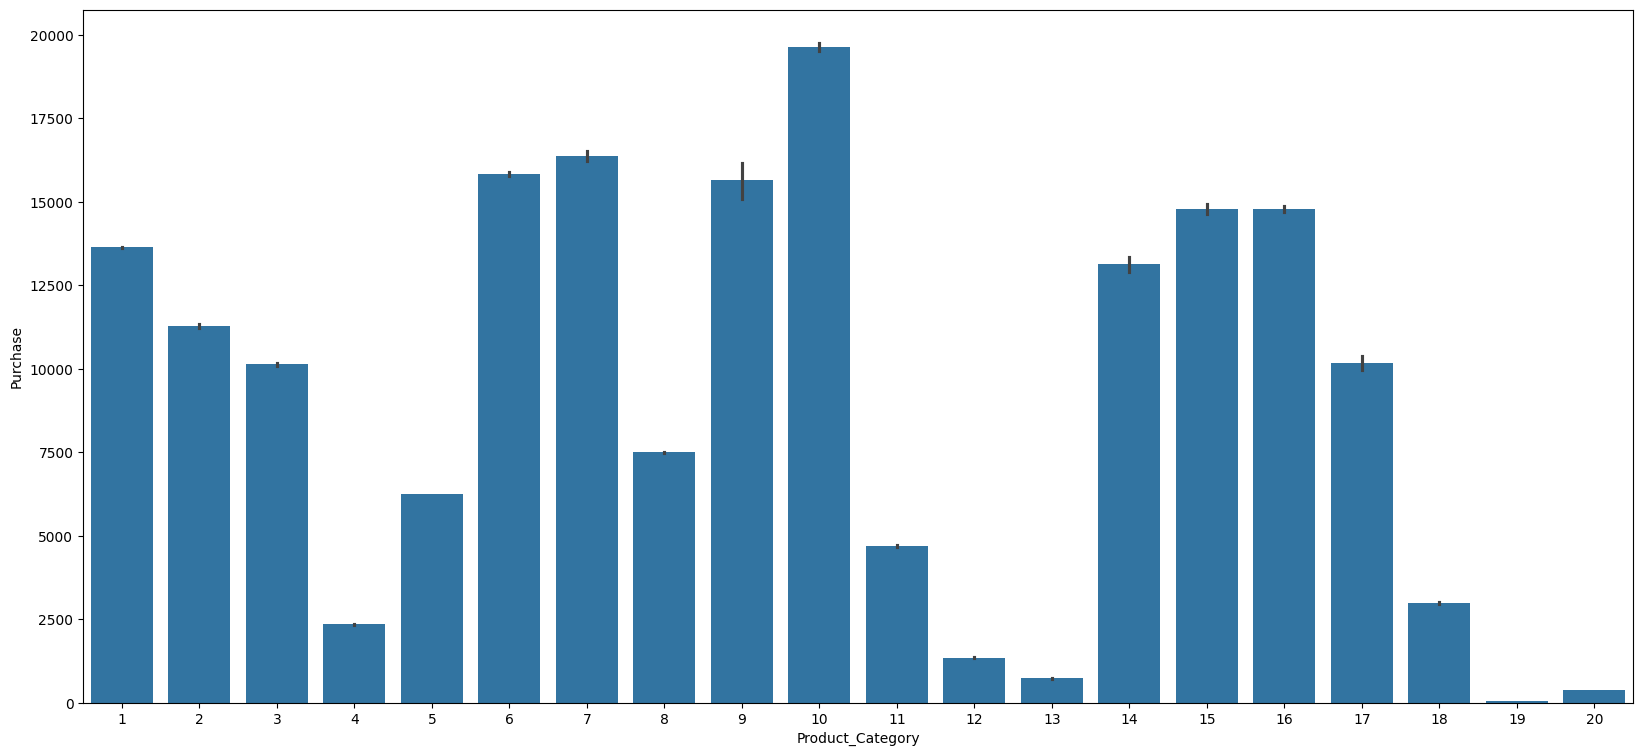

In [ ]:

plt.figure(figsize=(20, 9))
sns.barplot(x=df['Product_Category'], y=df['Purchase'], data=df)
plt.show()

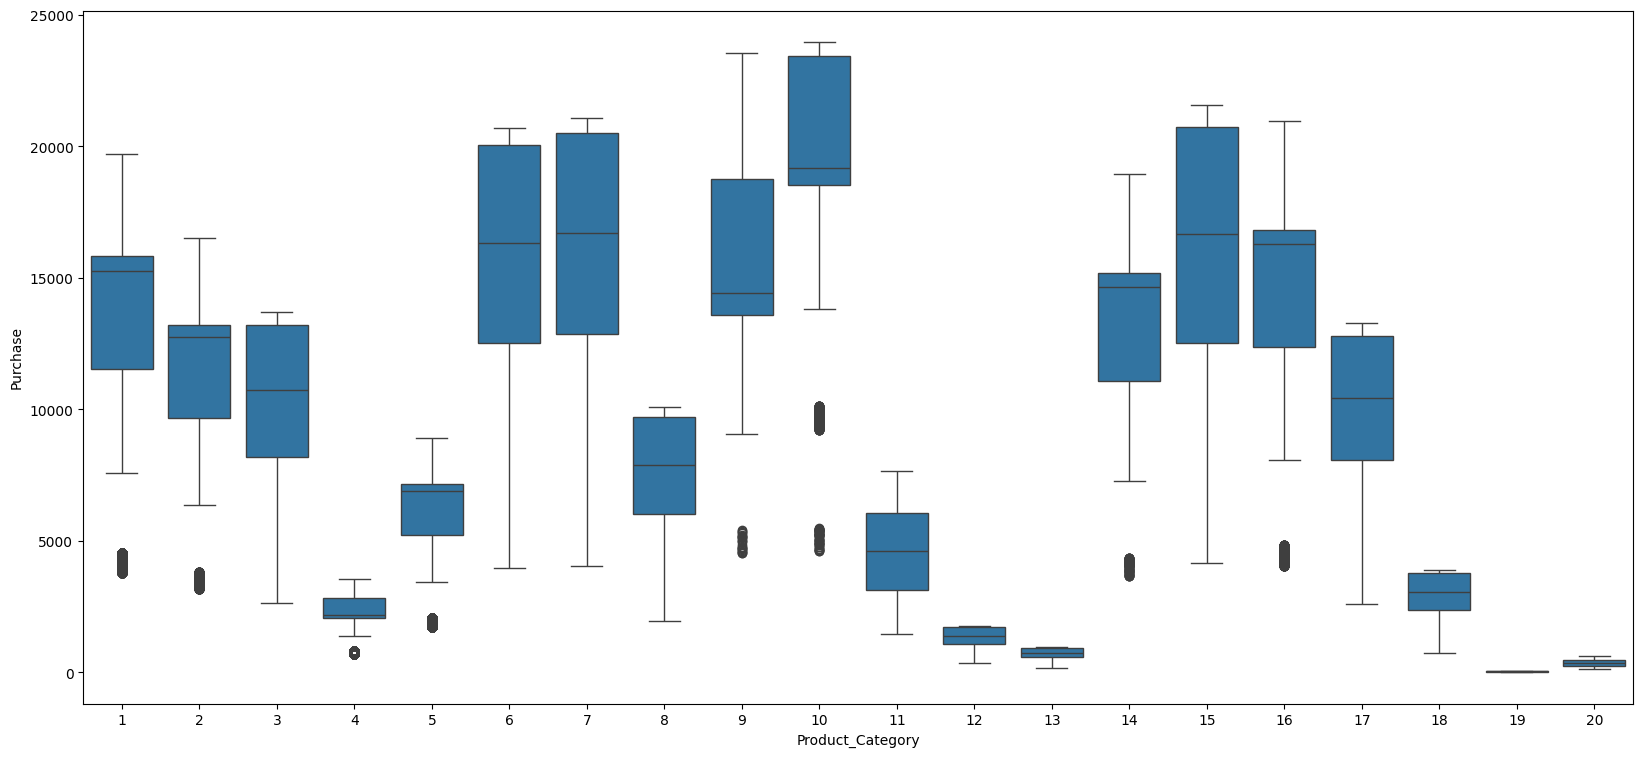

In [ ]:
plt.figure(figsize=(20, 9))
sns.boxplot(x=df['Product_Category'], y=df['Purchase'], data=df)
plt.show()

In [ ]:
df['Purchase'].describe().T

count    462778.000000
mean       9287.423006
std        5026.380531
min          12.000000
25%        5834.000000
50%        8052.000000
75%       12068.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
df['Product_ID'].nunique()

3612

<Axes: xlabel='Product_Category', ylabel='Purchase'>

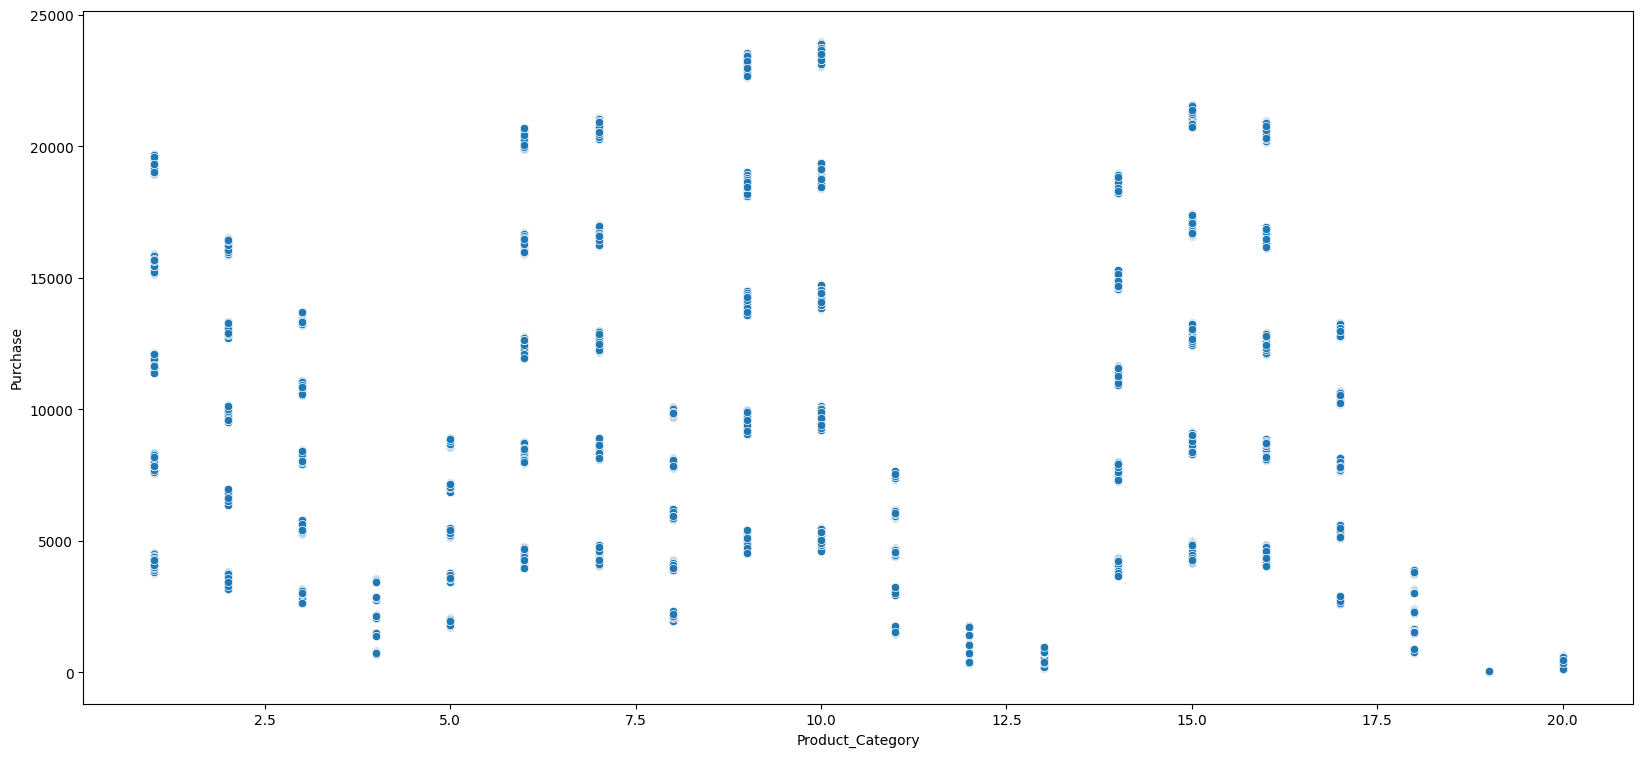

In [ ]:
plt.figure(figsize=(20, 9))
sns.scatterplot(x=df['Product_Category'], y=df['Purchase'],data=df)

In [ ]:
mean_product = df.groupby('Product_Category')['Purchase'].mean().reset_index()
mean_product.columns = ['product_category', 'mean']
print(mean_product.sort_values(ascending=False, by='mean'))

    product_category          mean
9                 10  19637.117053
6                  7  16372.768539
5                  6  15834.120548
8                  9  15635.815476
15                16  14781.022137
14                15  14774.594161
0                  1  13630.363028
13                14  13129.766876
1                  2  11283.695639
16                17  10163.635802
2                  3  10130.449519
7                  8   7488.920609
4                  5   6243.865417
10                11   4689.980250
17                18   2988.246637
3                  4   2342.423460
11                12   1346.868285
12                13    723.528758
19                20    370.024402
18                19     36.883136


In [ ]:
print(mean_product)

    product_category          mean
0                  1  13630.363028
1                  2  11283.695639
2                  3  10130.449519
3                  4   2342.423460
4                  5   6243.865417
5                  6  15834.120548
6                  7  16372.768539
7                  8   7488.920609
8                  9  15635.815476
9                 10  19637.117053
10                11   4689.980250
11                12   1346.868285
12                13    723.528758
13                14  13129.766876
14                15  14774.594161
15                16  14781.022137
16                17  10163.635802
17                18   2988.246637
18                19     36.883136
19                20    370.024402


In [ ]:
df['Product_Category'] = df['Product_Category'].astype(str)
df.info()

<ipython-input-564-24ab7eafaf2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_Category'] = df['Product_Category'].astype(str)


<class 'pandas.core.frame.DataFrame'>
Index: 462778 entries, 4 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     462778 non-null  int64 
 1   Product_ID                  462778 non-null  object
 2   Gender                      462778 non-null  object
 3   Age                         462778 non-null  object
 4   Occupation                  462778 non-null  object
 5   City_Category               462778 non-null  object
 6   Stay_In_Current_City_Years  462778 non-null  object
 7   Marital_Status              462778 non-null  int64 
 8   Product_Category            462778 non-null  object
 9   Purchase                    462778 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 38.8+ MB


In [ ]:
df['Product_Category'] = df['Product_Category'].replace('1.0', 'Electronics')
df['Product_Category'] = df['Product_Category'].replace('2.0', 'Clothing')
df['Product_Category'] = df['Product_Category'].replace('3.0', 'Groceries')
df['Product_Category'] = df['Product_Category'].replace('4.0', 'Home & Kitchen')
df['Product_Category'] = df['Product_Category'].replace('5.0', 'Sports & Outdoors')
df['Product_Category'] = df['Product_Category'].replace('6.0', 'Health & Beauty')
df['Product_Category'] = df['Product_Category'].replace('7.0', 'Toys & Games')
df['Product_Category'] = df['Product_Category'].replace('8.0', 'Automotive')
df['Product_Category'] = df['Product_Category'].replace('9.0', 'Books & Media')
df['Product_Category'] = df['Product_Category'].replace('10.0', 'Jewelry & Accessories')

df['Product_Category'] = df['Product_Category'].replace('11.0', 'Office Supplies')
df['Product_Category'] = df['Product_Category'].replace('12.0', 'Pet Supplies')
df['Product_Category'] = df['Product_Category'].replace('13.0', 'Garden & Outdoors')
df['Product_Category'] = df['Product_Category'].replace('14.0', 'Baby Products')
df['Product_Category'] = df['Product_Category'].replace('15.0', 'Musical Instruments')
df['Product_Category'] = df['Product_Category'].replace('16.0', 'Furniture')
df['Product_Category'] = df['Product_Category'].replace('17.0', 'Tools & Home Improvement')
df['Product_Category'] = df['Product_Category'].replace('18.0', 'Food & Beverages')
df['Product_Category'] = df['Product_Category'].replace('19.0', 'Arts & Crafts')
df['Product_Category'] = df['Product_Category'].replace('20.0', 'Miscellaneous')

<ipython-input-565-d8b68f01c25b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_Category'] = df['Product_Category'].replace('1.0', 'Electronics')
<ipython-input-565-d8b68f01c25b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_Category'] = df['Product_Category'].replace('2.0', 'Clothing')
<ipython-input-565-d8b68f01c25b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
df['Product_Category'] = df['Product_Category'].replace('1', 'Electronics')
df['Product_Category'] = df['Product_Category'].replace('2', 'Clothing')
df['Product_Category'] = df['Product_Category'].replace('3', 'Groceries')
df['Product_Category'] = df['Product_Category'].replace('4', 'Home & Kitchen')
df['Product_Category'] = df['Product_Category'].replace('5', 'Sports & Outdoors')
df['Product_Category'] = df['Product_Category'].replace('6', 'Health & Beauty')
df['Product_Category'] = df['Product_Category'].replace('7', 'Toys & Games')
df['Product_Category'] = df['Product_Category'].replace('8', 'Automotive')
df['Product_Category'] = df['Product_Category'].replace('9', 'Books & Media')
df['Product_Category'] = df['Product_Category'].replace('10', 'Jewelry & Accessories')

df['Product_Category'] = df['Product_Category'].replace('11', 'Office Supplies')
df['Product_Category'] = df['Product_Category'].replace('12', 'Pet Supplies')
df['Product_Category'] = df['Product_Category'].replace('13', 'Garden & Outdoors')
df['Product_Category'] = df['Product_Category'].replace('14', 'Baby Products')
df['Product_Category'] = df['Product_Category'].replace('15', 'Musical Instruments')
df['Product_Category'] = df['Product_Category'].replace('16', 'Furniture')
df['Product_Category'] = df['Product_Category'].replace('17', 'Tools & Home Improvement')
df['Product_Category'] = df['Product_Category'].replace('18', 'Food & Beverages')
df['Product_Category'] = df['Product_Category'].replace('19', 'Arts & Crafts')
df['Product_Category'] = df['Product_Category'].replace('20', 'Miscellaneous')

<ipython-input-566-cff8ec41211d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_Category'] = df['Product_Category'].replace('1', 'Electronics')
<ipython-input-566-cff8ec41211d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_Category'] = df['Product_Category'].replace('2', 'Clothing')
<ipython-input-566-cff8ec41211d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,Dentist,Chicago,4+,0,Automotive,7969
5,1000003,P00193542,M,26-35,Lawyer,New York,3,0,Electronics,15227
6,1000004,P00184942,M,46-50,Financial Analyst,Los Angeles,2,1,Electronics,19215
7,1000004,P00346142,M,46-50,Financial Analyst,Los Angeles,2,1,Electronics,15854
8,1000004,P0097242,M,46-50,Financial Analyst,Los Angeles,2,1,Electronics,15686
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,Pharmacist,Los Angeles,1,1,Miscellaneous,368
550064,1006035,P00375436,F,26-35,Teacher,Chicago,3,0,Miscellaneous,371
550065,1006036,P00375436,F,26-35,Lawyer,Los Angeles,4+,1,Miscellaneous,137
550066,1006038,P00375436,F,55+,Teacher,Chicago,2,0,Miscellaneous,365


In [ ]:
df.drop('Marital_Status', axis=1, inplace=True)
df

<ipython-input-568-8fc49206bf1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Marital_Status', axis=1, inplace=True)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category,Purchase
4,1000002,P00285442,M,55+,Dentist,Chicago,4+,Automotive,7969
5,1000003,P00193542,M,26-35,Lawyer,New York,3,Electronics,15227
6,1000004,P00184942,M,46-50,Financial Analyst,Los Angeles,2,Electronics,19215
7,1000004,P00346142,M,46-50,Financial Analyst,Los Angeles,2,Electronics,15854
8,1000004,P0097242,M,46-50,Financial Analyst,Los Angeles,2,Electronics,15686
...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,Pharmacist,Los Angeles,1,Miscellaneous,368
550064,1006035,P00375436,F,26-35,Teacher,Chicago,3,Miscellaneous,371
550065,1006036,P00375436,F,26-35,Lawyer,Los Angeles,4+,Miscellaneous,137
550066,1006038,P00375436,F,55+,Teacher,Chicago,2,Miscellaneous,365


In [ ]:
df.drop('Stay_In_Current_City_Years', axis=1, inplace=True)
df

<ipython-input-569-c519fd2d4a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Stay_In_Current_City_Years', axis=1, inplace=True)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Product_Category,Purchase
4,1000002,P00285442,M,55+,Dentist,Chicago,Automotive,7969
5,1000003,P00193542,M,26-35,Lawyer,New York,Electronics,15227
6,1000004,P00184942,M,46-50,Financial Analyst,Los Angeles,Electronics,19215
7,1000004,P00346142,M,46-50,Financial Analyst,Los Angeles,Electronics,15854
8,1000004,P0097242,M,46-50,Financial Analyst,Los Angeles,Electronics,15686
...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,Pharmacist,Los Angeles,Miscellaneous,368
550064,1006035,P00375436,F,26-35,Teacher,Chicago,Miscellaneous,371
550065,1006036,P00375436,F,26-35,Lawyer,Los Angeles,Miscellaneous,137
550066,1006038,P00375436,F,55+,Teacher,Chicago,Miscellaneous,365


In [ ]:
df = df.drop_duplicates(subset=['User_ID'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4932 entries, 4 to 243533
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           4932 non-null   int64 
 1   Product_ID        4932 non-null   object
 2   Gender            4932 non-null   object
 3   Age               4932 non-null   object
 4   Occupation        4932 non-null   object
 5   City_Category     4932 non-null   object
 6   Product_Category  4932 non-null   object
 7   Purchase          4932 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 346.8+ KB


In [ ]:
df['User_ID'].value_counts()

User_ID
1000002    1
1004443    1
1004452    1
1004451    1
1004450    1
          ..
1002233    1
1002232    1
1002231    1
1002230    1
1001529    1
Name: count, Length: 4932, dtype: int64

In [ ]:
df['Product_ID'].value_counts()

Product_ID
P00112142    60
P00265242    51
P00025442    42
P00080342    35
P00184942    34
             ..
P00215942     1
P00200342     1
P00110442     1
P00183042     1
P00000242     1
Name: count, Length: 1487, dtype: int64

In [ ]:
df = df.drop_duplicates(subset=['Product_ID'])

In [ ]:
df['Product_ID'].value_counts()

Product_ID
P00285442    1
P00350042    1
P00183042    1
P00110442    1
P00263442    1
            ..
P00065042    1
P00109142    1
P00177942    1
P00365042    1
P00000242    1
Name: count, Length: 1487, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 4 to 243533
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           1487 non-null   int64 
 1   Product_ID        1487 non-null   object
 2   Gender            1487 non-null   object
 3   Age               1487 non-null   object
 4   Occupation        1487 non-null   object
 5   City_Category     1487 non-null   object
 6   Product_Category  1487 non-null   object
 7   Purchase          1487 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 104.6+ KB


In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Product_Category,Purchase
4,1000002,P00285442,M,55+,Dentist,Chicago,Automotive,7969
5,1000003,P00193542,M,26-35,Lawyer,New York,Electronics,15227
6,1000004,P00184942,M,46-50,Financial Analyst,Los Angeles,Electronics,19215
9,1000005,P00274942,M,26-35,Veterinarian,New York,Automotive,7871
14,1000006,P00231342,F,51-55,Chef,New York,Sports & Outdoors,5378
...,...,...,...,...,...,...,...,...
133297,1002542,P00023342,F,46-50,Pharmacist,New York,Groceries,10609
133483,1002584,P00291342,F,55+,Teacher,Chicago,Automotive,7845
133573,1002601,P00047442,M,36-45,Dentist,Chicago,Sports & Outdoors,6916
146332,1004527,P00233142,M,18-25,Software Developer,Chicago,Electronics,7876


In [ ]:
def transform_value(x):
  parts = str(int(x)).zfill(4)
  return parts[-4:]

df['User_ID'] = df['User_ID'].apply(transform_value)
df['User_ID']

4         0002
5         0003
6         0004
9         0005
14        0006
          ... 
133297    2542
133483    2584
133573    2601
146332    4527
243533    1529
Name: User_ID, Length: 1487, dtype: object

In [ ]:
df['User_ID'].sort_values(ascending=True).astype(int)

4           2
5           3
6           4
9           5
14          6
         ... 
39086    6025
39100    6030
39109    6032
39117    6034
39153    6037
Name: User_ID, Length: 1487, dtype: int64

In [ ]:
df['Product_ID'].sort_values(ascending=False)

32062      P0099842
36722      P0099442
1192       P0099342
11911      P0099242
703        P0099042
            ...    
13913     P00001142
27443     P00001042
9891      P00000642
243533    P00000242
3551      P00000142
Name: Product_ID, Length: 1487, dtype: object

In [ ]:
def transform_value(x):
  parts = str(x).zfill(4)
  return parts[-6:]

df['Product_ID'] = df['Product_ID'].apply(transform_value)
df['Product_ID'].sort_values(ascending=False)

6150      370642
1270      370242
11917     369942
13368     369142
6077      369042
           ...  
13913     001142
27443     001042
9891      000642
243533    000242
3551      000142
Name: Product_ID, Length: 1487, dtype: object

In [ ]:
df['Product_ID'].value_counts()

Product_ID
285442    1
350042    1
183042    1
110442    1
263442    1
         ..
065042    1
109142    1
177942    1
365042    1
000242    1
Name: count, Length: 1487, dtype: int64

In [ ]:
df2 = df.sort_values(by=['User_ID'], ascending=True)

In [ ]:
df2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Product_Category,Purchase
4,0002,285442,M,55+,Dentist,Chicago,Automotive,7969
5,0003,193542,M,26-35,Lawyer,New York,Electronics,15227
6,0004,184942,M,46-50,Financial Analyst,Los Angeles,Electronics,19215
9,0005,274942,M,26-35,Veterinarian,New York,Automotive,7871
14,0006,231342,F,51-55,Chef,New York,Sports & Outdoors,5378
...,...,...,...,...,...,...,...,...
39086,6025,275142,F,26-35,Teacher,Los Angeles,Sports & Outdoors,5201
39100,6030,205242,M,26-35,Pilot,Chicago,Sports & Outdoors,5298
39109,6032,327642,M,46-50,Financial Analyst,New York,Food & Beverages,2395
39117,6034,252242,M,26-35,Civil Engineer,New York,Health & Beauty,20317


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 4 to 39153
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           1487 non-null   object
 1   Product_ID        1487 non-null   object
 2   Gender            1487 non-null   object
 3   Age               1487 non-null   object
 4   Occupation        1487 non-null   object
 5   City_Category     1487 non-null   object
 6   Product_Category  1487 non-null   object
 7   Purchase          1487 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 104.6+ KB


In [ ]:
df2.shape

(1487, 8)

In [ ]:
df2.to_csv('cleaned_walmart.csv')

<Axes: xlabel='Age', ylabel='Purchase'>

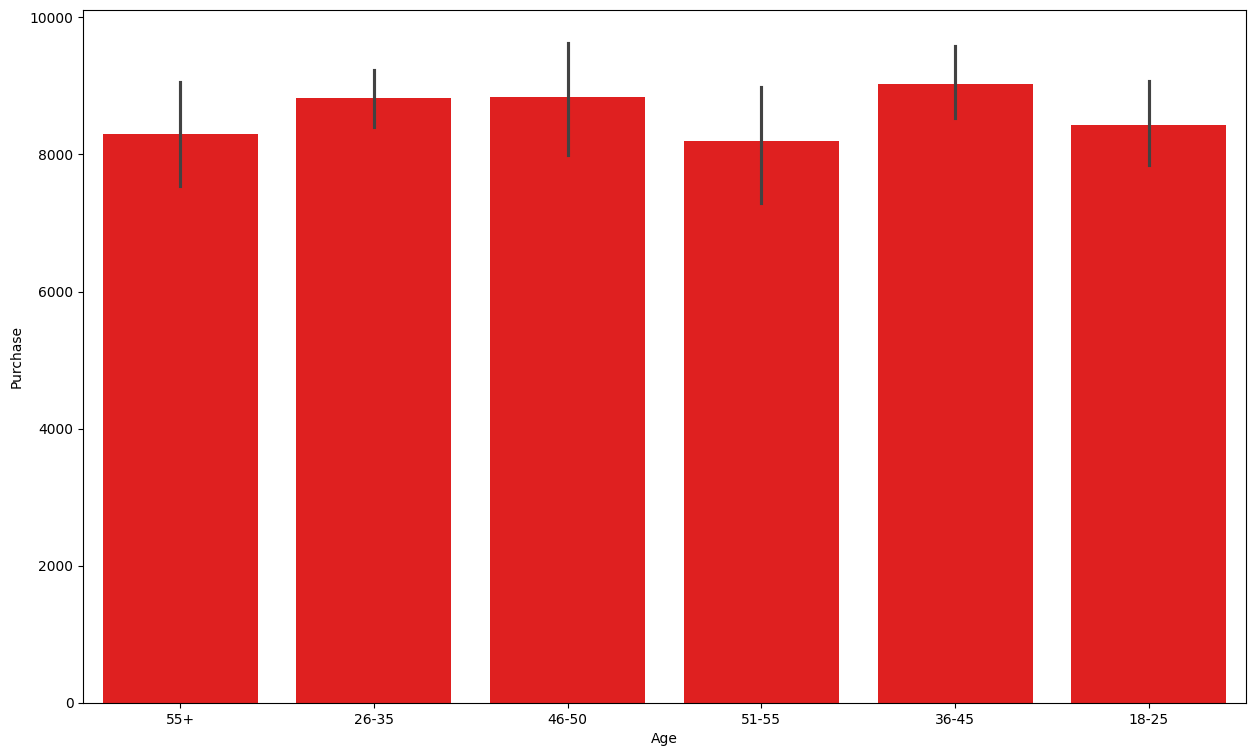

In [ ]:
plt.figure(figsize=(15, 9))
sns.barplot(x=df2['Age'], y=df2['Purchase'], color='red')

<Axes: xlabel='Gender', ylabel='Purchase'>

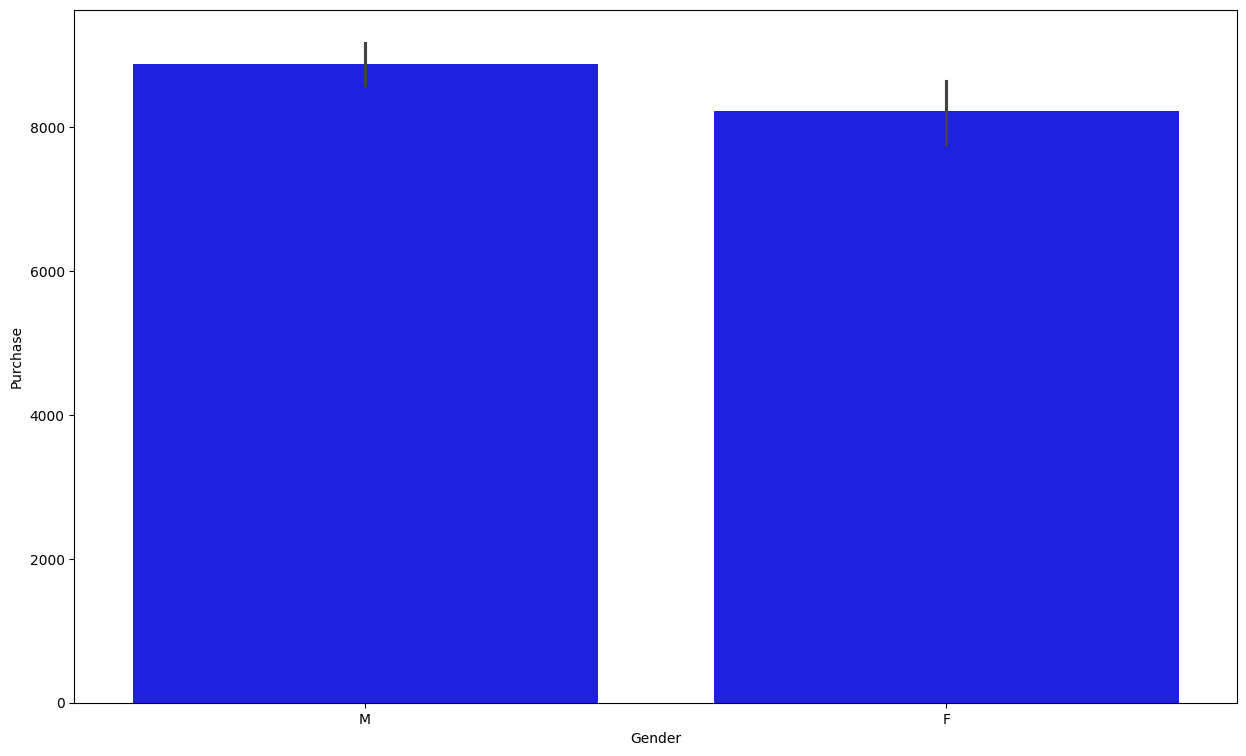

In [ ]:
plt.figure(figsize=(15, 9))
sns.barplot(x=df2['Gender'], y=df2['Purchase'], color='blue')

<Axes: xlabel='Occupation', ylabel='Purchase'>

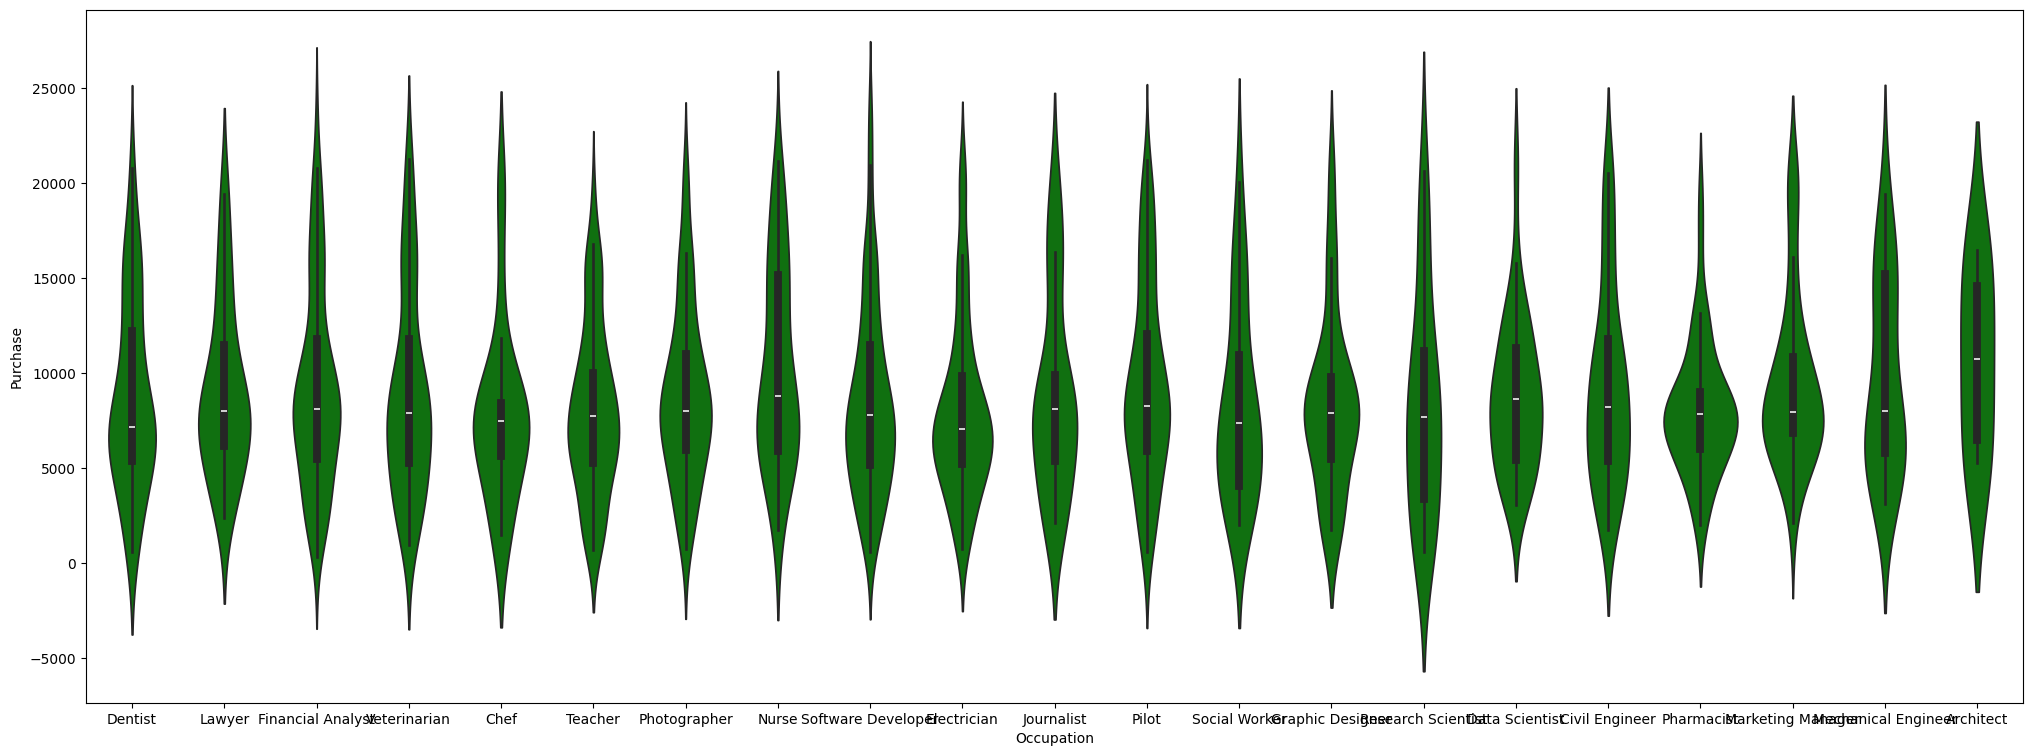

In [ ]:
plt.figure(figsize=(25, 9))
sns.violinplot(x=df2['Occupation'], y=df2['Purchase'], data=df2, color='green')